7530
               l_names l_team20 l_pos20  l_gp20  l_points20  draft_salary  \
0  Christian McCaffrey      Car      RB       3    99.43000         100.0   
1          Dalvin Cook      Min      RB      14   403.76999          53.0   
2        Derrick Henry      Ten      RB      16   397.29999          55.0   
3         Alvin Kamara       NO      RB      15   428.00000          56.0   
5      Ezekiel Elliott      Dal      RB      15   286.42999          61.0   
6       Saquon Barkley      NYG      RB       2    17.40000          59.0   
7           Nick Chubb      Cle      RB      12   239.70000          36.0   

  l_team19 l_pos19  l_gp19  l_points19  ...  l_rectd19  l_rec1st19  \
0      Car      RB    16.0   530.70001  ...        4.0        58.0   
1      Min      RB    14.0   335.10001  ...        0.0        26.0   
2      Ten      RB    15.0   336.73001  ...        2.0         4.0   
3       NO      RB    14.0   285.75000  ...        1.0        28.0   
5      Dal      RB    16.0  

/Users/preranadevadhar/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


(109, 7) (109,)
(20, 7) (20,)
linear train / test rmse:  42.40708882798875  /  40.462029327020105
linear train / test r^2:  0.8043061549786967  /  0.7985016722647416
Linear Regression intercept:  78.98103480915668
Linear Regression coefficients:  [ 2.53205652e-13 -6.07798970e-01 -1.11333185e+01  1.40437765e+00
  1.23721101e+01  1.29803344e-01  1.95450583e+01 -5.43026466e+01
 -1.58595082e-02  3.10204764e-01  4.58800184e-02 -1.00132050e+00
 -3.78295037e-02 -3.83133948e-01 -7.43789039e-01  1.07430942e+00
  5.41182874e-02 -3.74550739e+00 -6.60920783e-01  2.52554419e+00
  1.21923197e+00 -4.44445563e-02  7.99735831e-01 -8.42718652e-01
  0.00000000e+00  1.52763538e+00  1.23721101e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.29803344e-01  0.00000000e+00
  0.00000000e+00  1.95450583e+01  0.00000000e+00 -5.43026466e+01]
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x2^

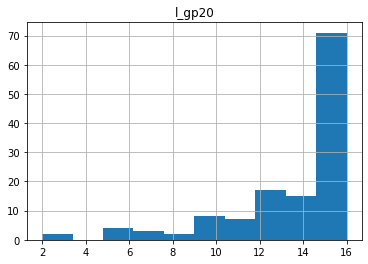

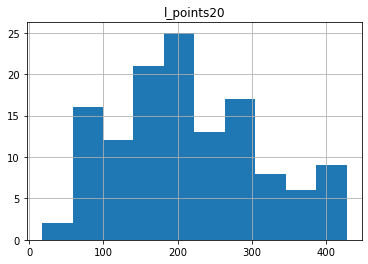

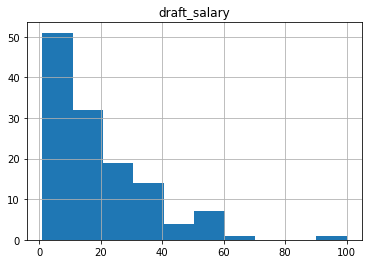

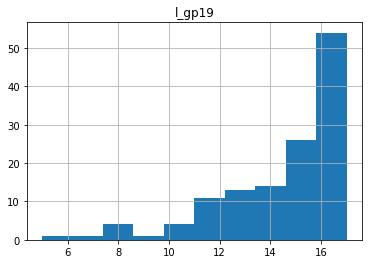

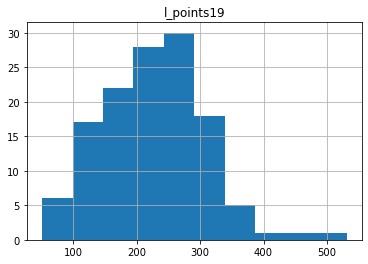

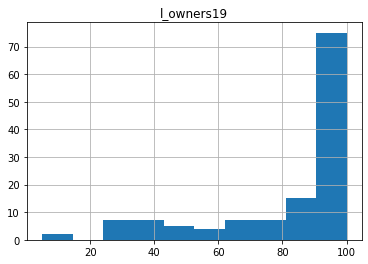

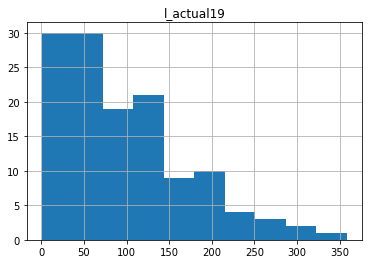

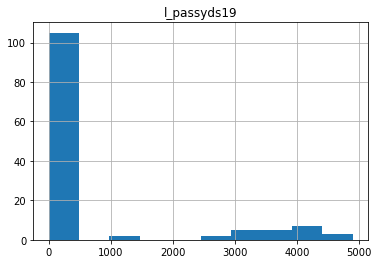

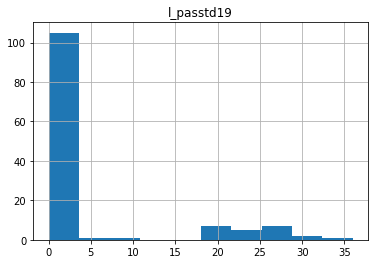

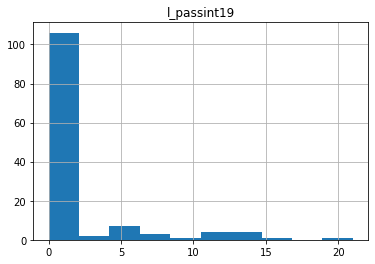

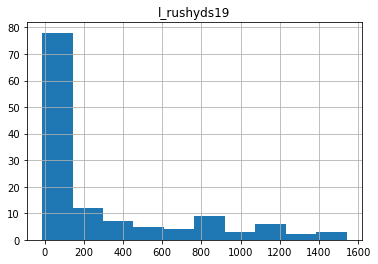

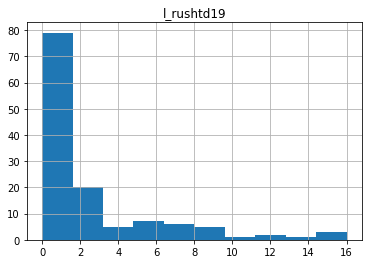

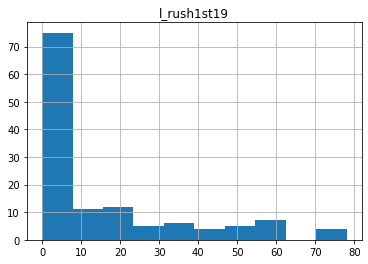

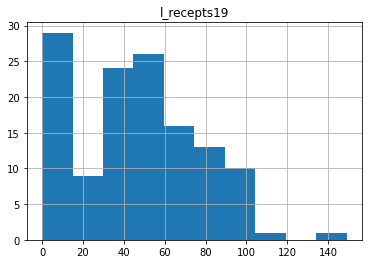

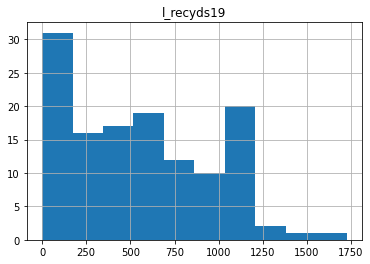

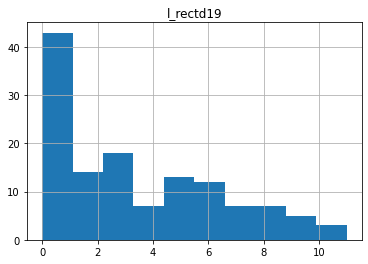

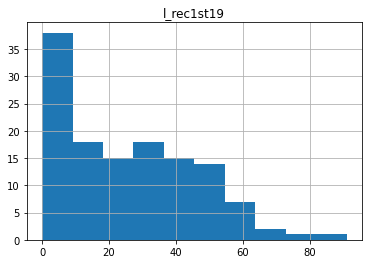

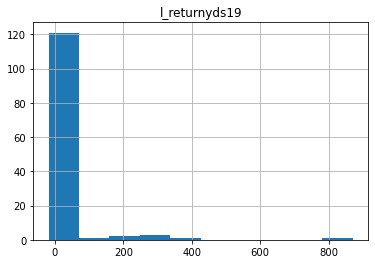

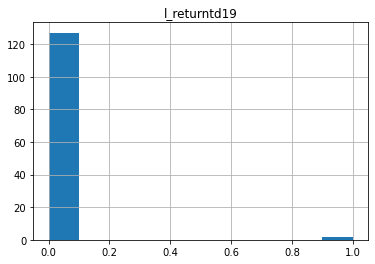

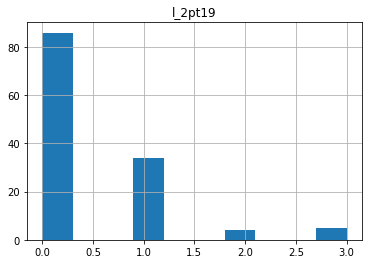

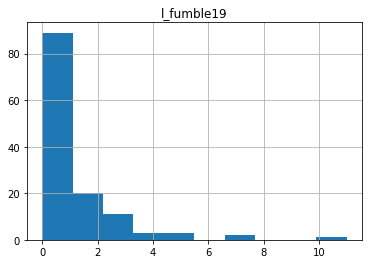

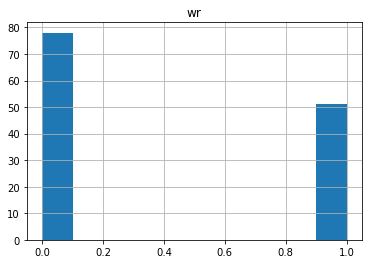

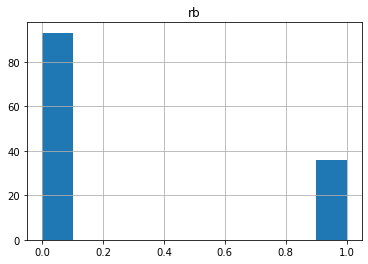

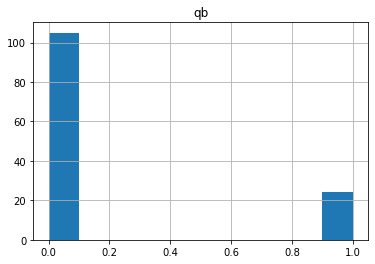

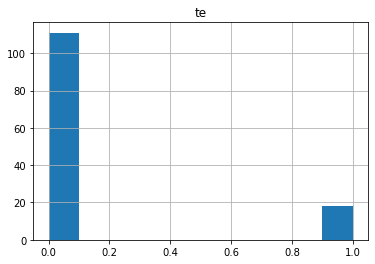

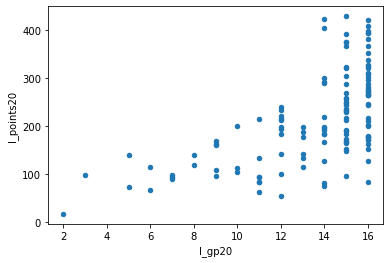

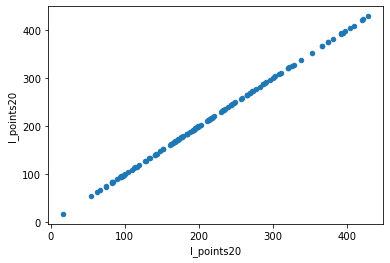

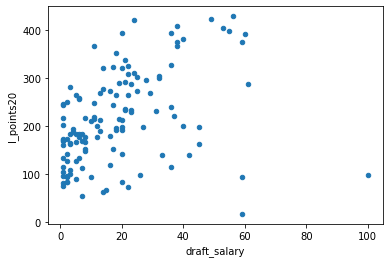

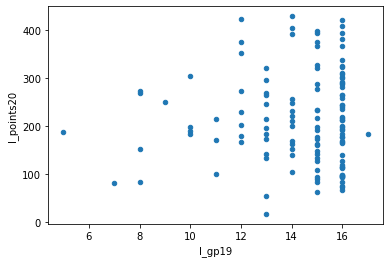

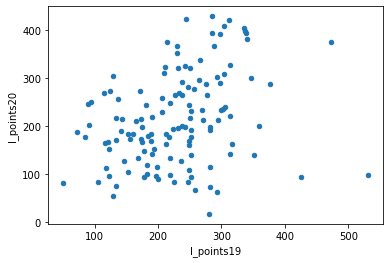

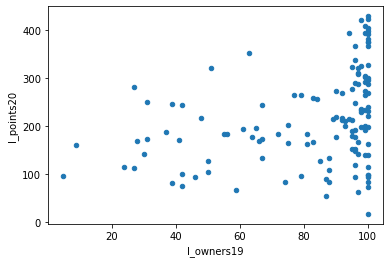

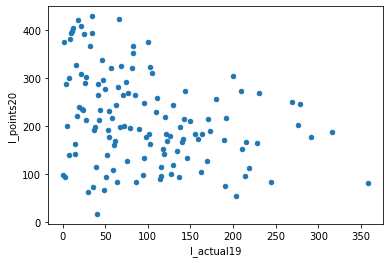

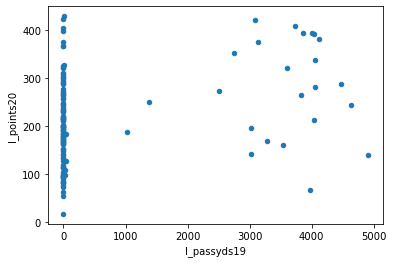

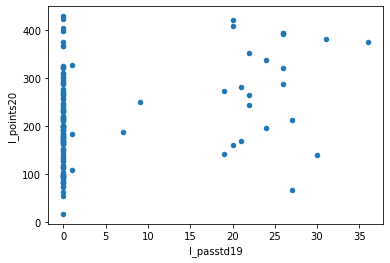

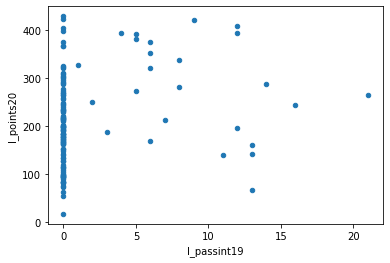

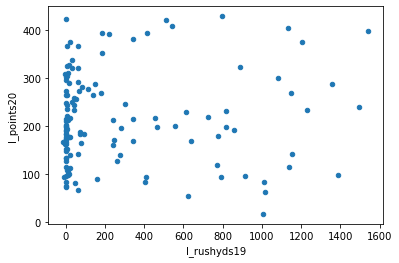

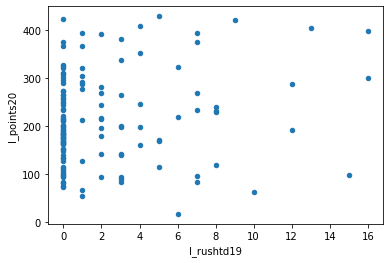

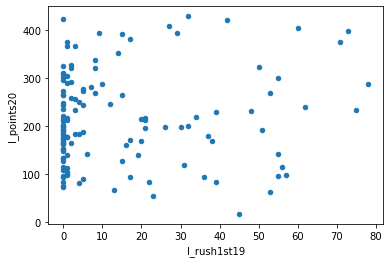

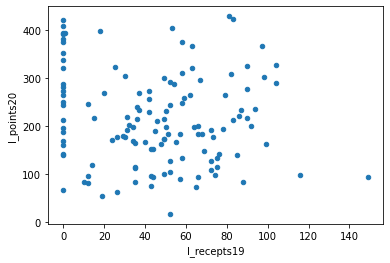

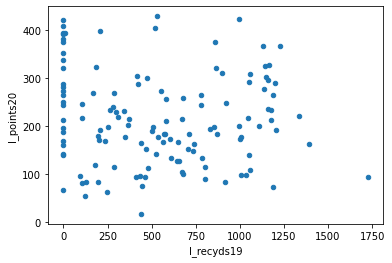

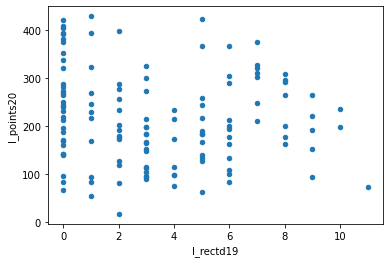

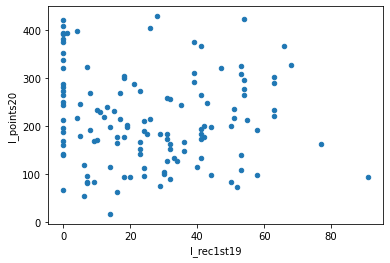

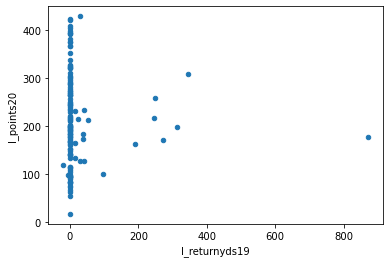

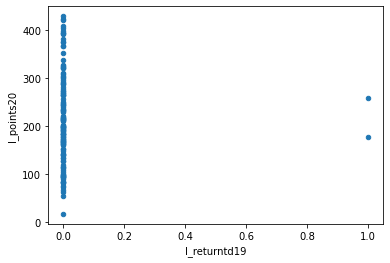

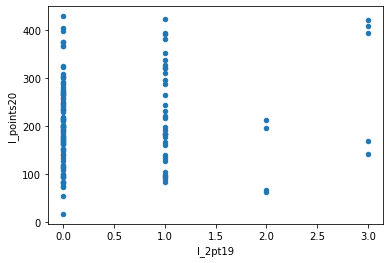

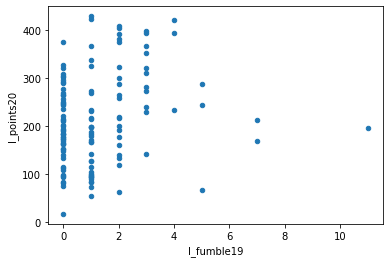

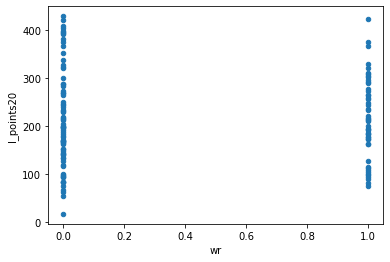

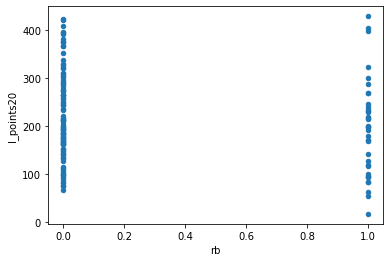

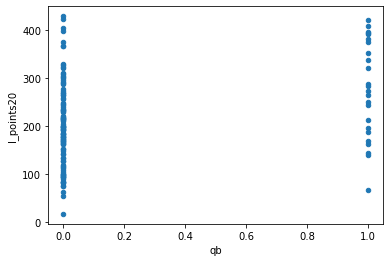

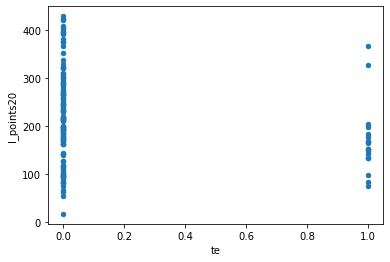

In [1]:
# @author Prerana Devadhar
# @date 11-08-21
# Polynomial Regression for NFL Player Stats Using SKLearn 

import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
df1 = pd.read_csv("class2.csv")
#print(df1.iloc[:7])
#print (df1.describe())
print(df1.size)
df2 = df1.dropna(0)
print(df2.iloc[:7])
print(df2.size)
# print (df2.describe())
print(df2.columns)
# print histograms for all continuous parameters/IVs and 4 dummy parameters/IVs 
for col in df2.columns:
    if(col!='l_names' and col!='l_team20' and col!='l_pos20' 
       and col!='l_team19' and col!='l_pos19'):
        df2.hist(column = col)
# print scatterplots for all continuous parameters/IVs and 4 dummy parameters/IVs
for col in df2.columns:
    if(col!='l_names' and col!='l_team20' and col!='l_pos20' 
       and col!='l_team19' and col!='l_pos19'):
        df2.plot.scatter(x=col, y='l_points20')
# construct list of parameters/IVs from which polynomial feature set will be constructed
IVs = ['draft_salary', 'l_gp20', 'l_rec1st19', 'wr', 'rb', 'qb', 'te']
# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(df2.loc[:, IVs], df2.loc[:, 'l_points20'], test_size=0.15, random_state=13)
# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
# construct Pipeline object using PolynomialFeatures and Linear Regression as estimators
poly_model = make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True))
# estimate linear model with polynomial features
poly_1 = poly_model.fit(x_train, y_train)
# predict values for test sets
poly_1_predict = poly_1.predict(x_test)
# find RMSE; y_true first then y_model
print ("linear train / test rmse: ", mean_squared_error(y_train, poly_1.predict(x_train))**(.5), " / ", mean_squared_error(y_test, poly_1_predict)**(.5))
# also do R^2
print ("linear train / test r^2: ", r2_score(y_train, poly_1.predict(x_train)), " / ", r2_score(y_test, poly_1_predict))
# print intercept, ORDERED coefficients, and ORDERED polynomial features
print("Linear Regression intercept: ", poly_1['linearregression'].intercept_) 
print("Linear Regression coefficients: ", poly_1['linearregression'].coef_)
print(PolynomialFeatures(2).fit(x_train, y_train).get_feature_names())